Import Numpy Train Data (Indexes)

In [37]:
import numpy as np

train_np = np.load('../data/annotations/train_stanford_StanfordExtra_v12.npy')

print(f"Train Data Set Size {train_np.size}")

train_np


Train Data Set Size 6773


array([ 910,  917,  920, ..., 8977, 9745, 9742])

Import Numpy Validation Data (Indexes)

In [38]:
validation_np = np.load('../data/annotations/val_stanford_StanfordExtra_v12.npy')

print(f"Validation Data Set Size {validation_np.size}")

Validation Data Set Size 4062


Import Numpy Test Data (Indexes)

In [39]:
test_np = np.load('../data/annotations/test_stanford_StanfordExtra_v12.npy')

print(f"Test Data Set Size {test_np.size}")

Test Data Set Size 1703


In [40]:
total_data_size = train_np.size + test_np.size + validation_np.size

print(f"Total Data Set size {total_data_size}")

Total Data Set size 12538


Import Annotation JSON and Print an Example

In [41]:
import json

json_file = open('../data/annotations/StanfordExtra_v12.json')

annotation_data = json.load(json_file)

print(f"JSON Data Size {len(annotation_data)}")

json_formatted_str = json.dumps(annotation_data[0], indent=4)

print(json_formatted_str)

JSON Data Size 12538
{
    "img_path": "n02085782-Japanese_spaniel/n02085782_2886.jpg",
    "img_width": 350,
    "img_height": 272,
    "img_bbox": [
        205,
        20,
        116,
        201
    ],
    "is_multiple_dogs": false,
    "joints": [
        [
            108.66666666666667,
            252.0,
            1
        ],
        [
            147.66666666666666,
            229.0,
            1
        ],
        [
            163.5,
            208.5,
            1
        ],
        [
            0,
            0,
            0
        ],
        [
            0,
            0,
            0
        ],
        [
            0,
            0,
            0
        ],
        [
            54.0,
            244.0,
            1
        ],
        [
            77.33333333333333,
            225.33333333333334,
            1
        ],
        [
            79.0,
            196.5,
            1
        ],
        [
            0,
            0,
            0
        ]

Load first image

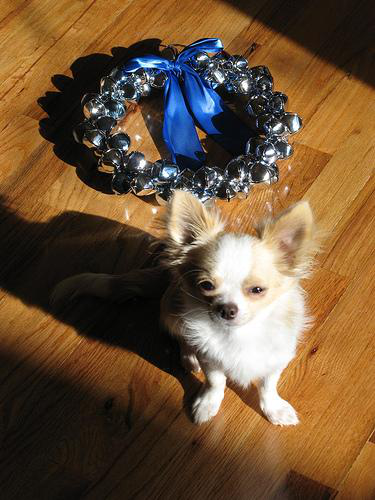

In [42]:
from PIL import Image
from IPython.display import display

first_annotation = annotation_data[1164]

img_path = first_annotation['img_path']

first_img = Image.open(f"../data/Images/{img_path}")

display(first_img)

Add Bounding Box to Image

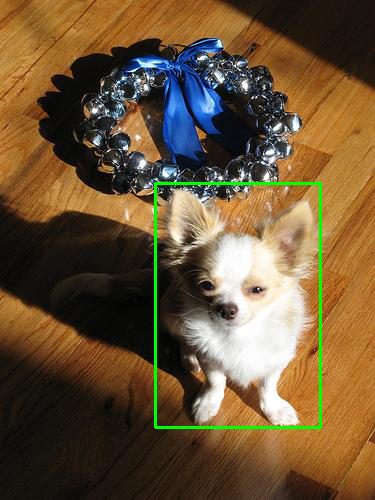

In [43]:
import cv2

bbox = first_annotation['img_bbox']

bbox_x, bbox_y, bbox_width, bbox_height = bbox

# First Corner
x0 = bbox_x
y0 = bbox_y

start_point = (x0, y0)

# Diagonal Corner
x1 = x0 + bbox_width
y1 = y0 + bbox_height

end_point = (x1, y1)

# Convert image to numpy array
first_image_data = np.asarray(first_img)

image_with_bbox = cv2.rectangle(first_image_data, start_point, end_point, color=(0,255,0), thickness=2)

display(Image.fromarray(image_with_bbox))

Draw the contours on the image

In [44]:
joints = first_annotation['joints']

print("All Joints")

joints


All Joints


[[289.6666666666667, 416.0, 1],
 [267.5, 386.0, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [195.66666666666666, 413.0, 1],
 [216.5, 385.0, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [51.0, 302.0, 1],
 [293.6666666666667, 236.33333333333334, 1],
 [185.33333333333334, 217.0, 1],
 [222.33333333333334, 304.3333333333333, 1],
 [235.33333333333334, 330.6666666666667, 1],
 [306.00666666666666, 201.82666666666665, 1],
 [176.2336448598131, 191.20560747663552, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

Read in the keypoint definitions

In [45]:


from csv import DictReader


keypoint_def_file = open('../data/annotations/keypoint_definitions.csv')

keypoint_def = DictReader(keypoint_def_file)

keypoint_colors = []
keypoint_labels = []
for row in keypoint_def:
    keypoint_colors.append(f"#{row['Hex colour']}")
    keypoint_labels.append(row['Name'])

print("Keypoint Colors")
print(keypoint_colors)

print("Keypoint Labels")
print(keypoint_labels)

Keypoint Colors
['#d82400', '#d82400', '#d82400', '#fcfc00', '#fcfc00', '#fcfc00', '#48b455', '#48b455', '#48b455', '#0090aa', '#0090aa', '#0090aa', '#d848ff', '#d848ff', '#fc90aa', '#006caa', '#d89000', '#d89000', '#fc90aa', '#006caa', '#ededed', '#ededed', '#a9d08e', '#a9d08e']
Keypoint Labels
['Left front leg: paw', 'Left front leg: middle joint', 'Left front leg: top', 'Left rear leg: paw', 'Left rear leg: middle joint', 'Left rear leg: top', 'Right front leg: paw', 'Right front leg: middle joint', 'Right front leg: top', 'Right rear leg: paw', 'Right rear leg: middle joint', 'Right rear leg: top', 'Tail start', 'Tail end', 'Base of left ear', 'Base of right ear', 'Nose', 'Chin', 'Left ear tip', 'Right ear tip', 'Left eye', 'Right eye', 'Withers', 'Throat']


Filter Keypoints that are not visible

In [46]:
visible_keypoints = []
visible_keypoint_colors = []
visible_keypoint_labels = []

for idx, keypoint in enumerate(joints):
    (x, y, v) = keypoint

    # Its important to check if the join is visible
    if (v == 1):
        visible_keypoints.append((x, y))
        visible_keypoint_colors.append(keypoint_colors[idx])
        visible_keypoint_labels.append(keypoint_labels[idx])



Add Keypoints Using OpenCV

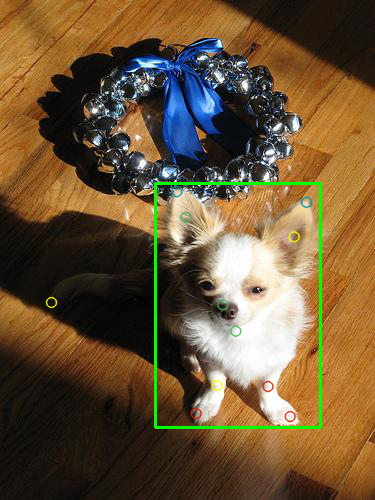

In [47]:
from PIL import ImageColor

im_with_keypoints = image_with_bbox
for idx, keypoint in enumerate(visible_keypoints):
    keypoint_color = ImageColor.getcolor(keypoint_colors[idx], "RGB")
    x, y = keypoint
    cv_keypoint = cv2.KeyPoint(x, y, 10)
    im_with_keypoints = cv2.drawKeypoints(im_with_keypoints, [cv_keypoint], 0, keypoint_color, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

display(Image.fromarray(im_with_keypoints))